# Exploratory Analysis

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features, 

1) Display histograms for the numerical features. 
2) Construct the scatter plots of price with each of the numerical features.
3) Display the correlation histogram.
4) Which numerical feature appears to be most predictive of the price?

In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0


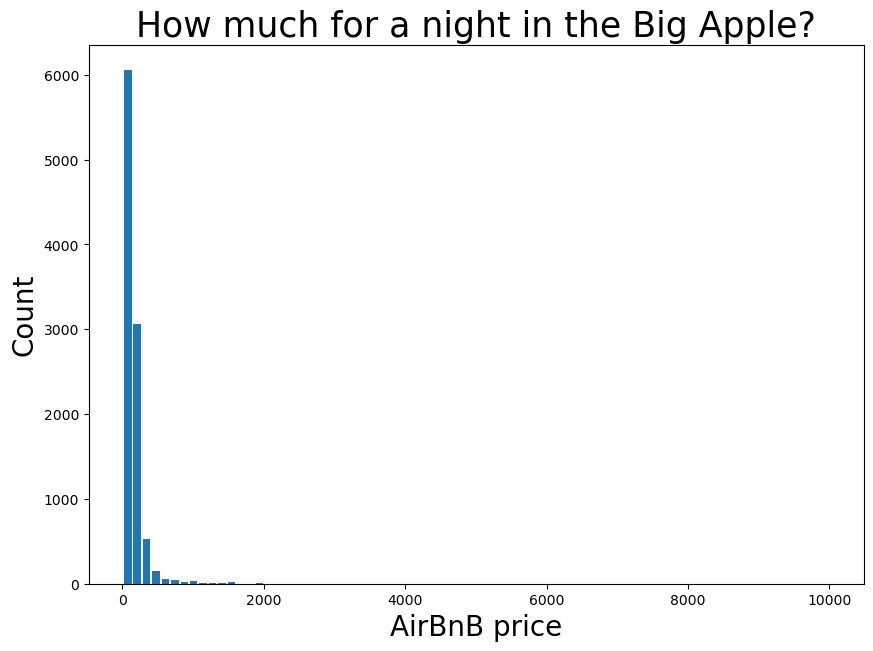

In [13]:
#lets take a look
fig, ax = plt.subplots()

ax.hist(data.price, bins=75, rwidth = 0.8)
ax.set_xlabel('AirBnB price', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('How much for a night in the Big Apple?', fontsize = 25)
fig.set_size_inches(10, 7)
plt.show()

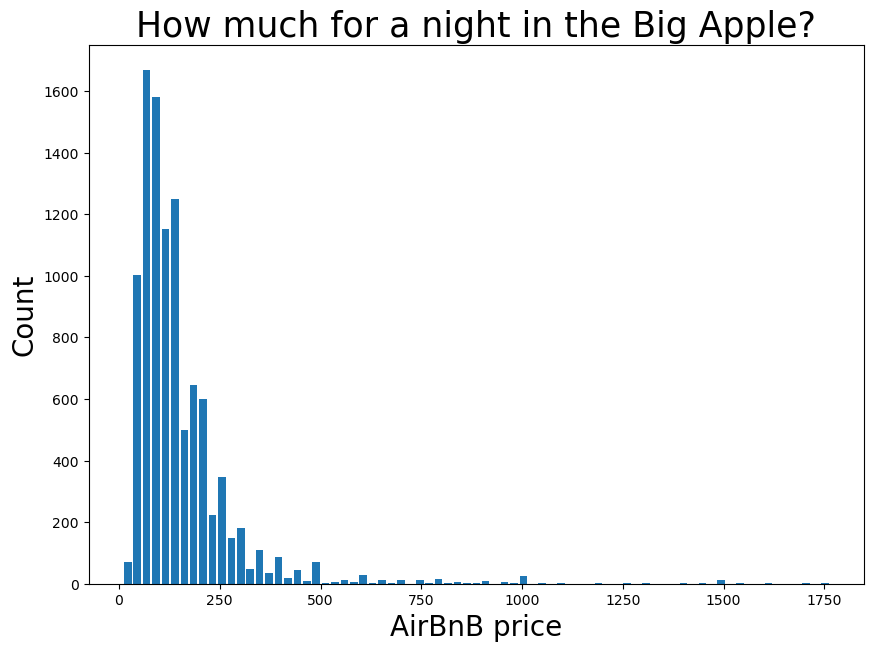

In [12]:
#death to all outliers!

z = data.price < 1800 #who pays 1800 for an AirBnB? sheesh!
datac = data[z]


fig, ax = plt.subplots()

ax.hist(datac.price, bins=75, rwidth = 0.8)
ax.set_xlabel('AirBnB price', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('How much for a night in the Big Apple?', fontsize = 25)
fig.set_size_inches(10, 7)
plt.show()

In [2]:
#lets see what data types are in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            9991 non-null   object 
 1   host_id                         9999 non-null   int64  
 2   host_name                       9989 non-null   object 
 3   neighbourhood_group             9999 non-null   object 
 4   neighbourhood                   9999 non-null   object 
 5   latitude                        9999 non-null   float64
 6   longitude                       9999 non-null   float64
 7   room_type                       9999 non-null   object 
 8   price                           9999 non-null   int64  
 9   minimum_nights                  9999 non-null   int64  
 10  number_of_reviews               9999 non-null   int64  
 11  last_review                     8677 non-null   object 
 12  reviews_per_month               86

In [5]:
#lets start with the quantitative features
nums = data.select_dtypes(include = ['int64', 'float64'])
display(nums.head(5))

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [14]:
#again lets excise outliers to make the plots more readable

numsc = nums[nums.price<1800]

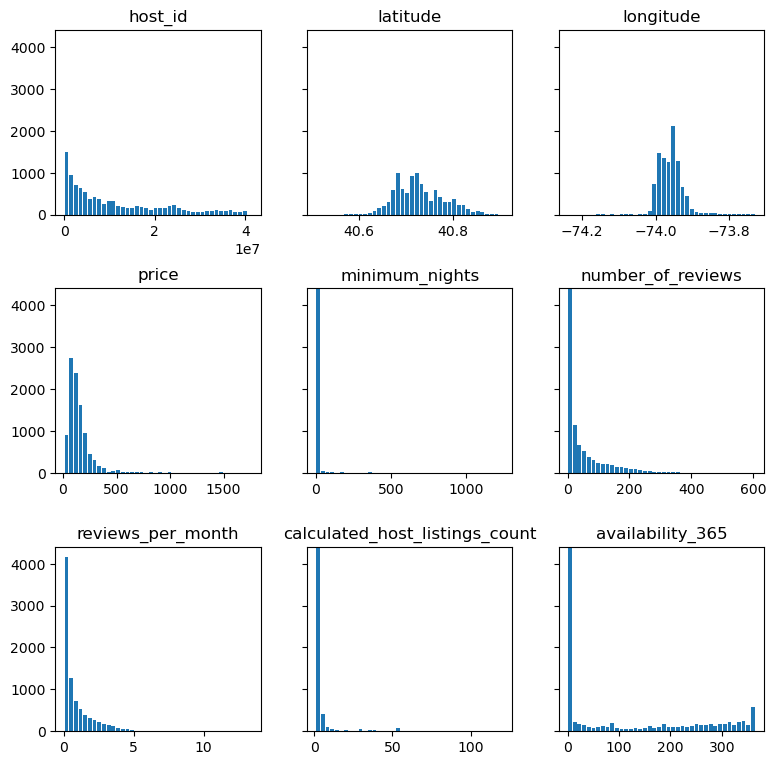

In [92]:
#lets look at histograms for each of our 9 features

fig, axes = plt.subplots(3, 3, sharey = True)
fig.tight_layout()

names = list(numsc)
axes = axes.reshape(9)

for i in range(9):
    counts, bins, patches = axes[i].hist(numsc[names[i]], bins=40, rwidth=0.8)
    axes[i].set_title(names[i])
    axes[i].set_ylim([0, max(counts)])
    fig.set_size_inches(8, 8)
    
plt.show()

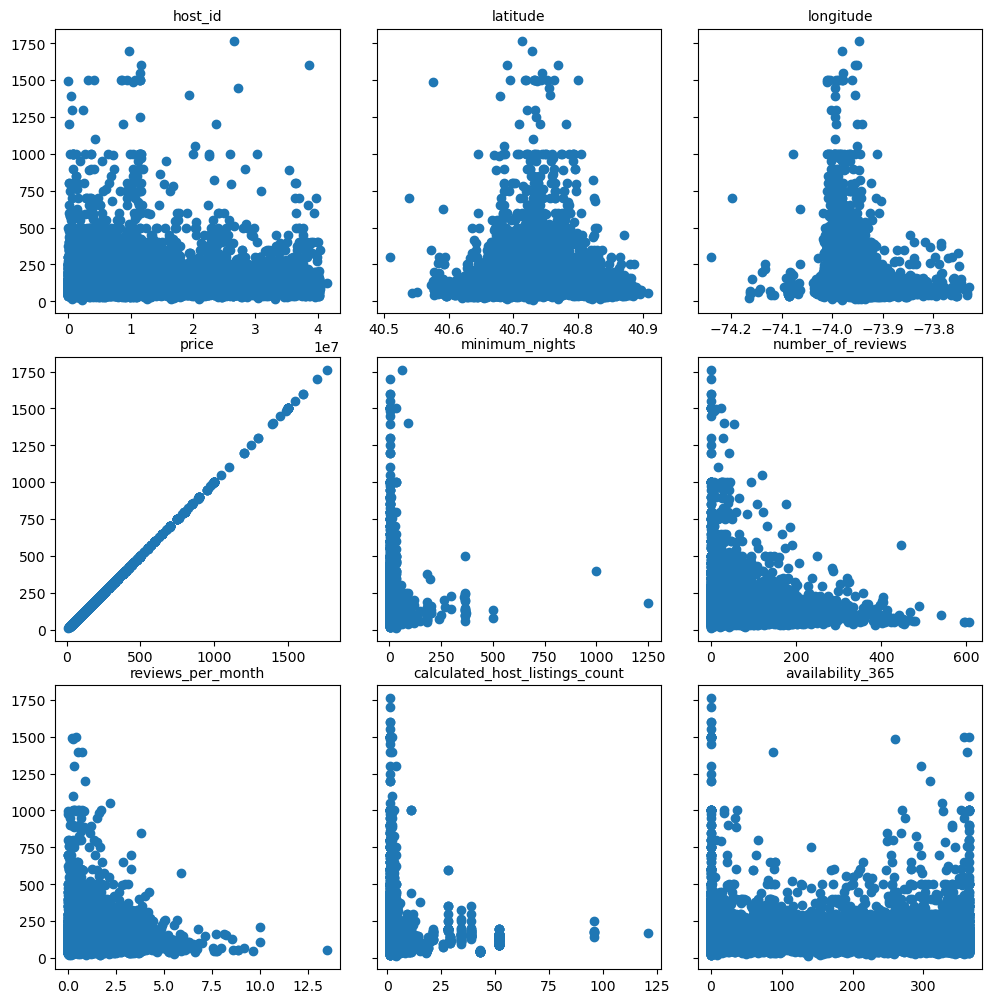

In [95]:
#now let's look at scatterplots for each of the numeric features
#notice that none of the features seem correlated with price, which will be seen using a heatmap later on

f, axes = plt.subplots(3, 3, sharey=True)
f.set_size_inches(10,10)
f.tight_layout()

axes = axes.reshape(9)

for i in range(9):
    axes[i].plot(numsc[names[i]], numsc.price, 'o')
    axes[i].set_title(names[i], fontsize=10)
    
plt.show()

<AxesSubplot:>

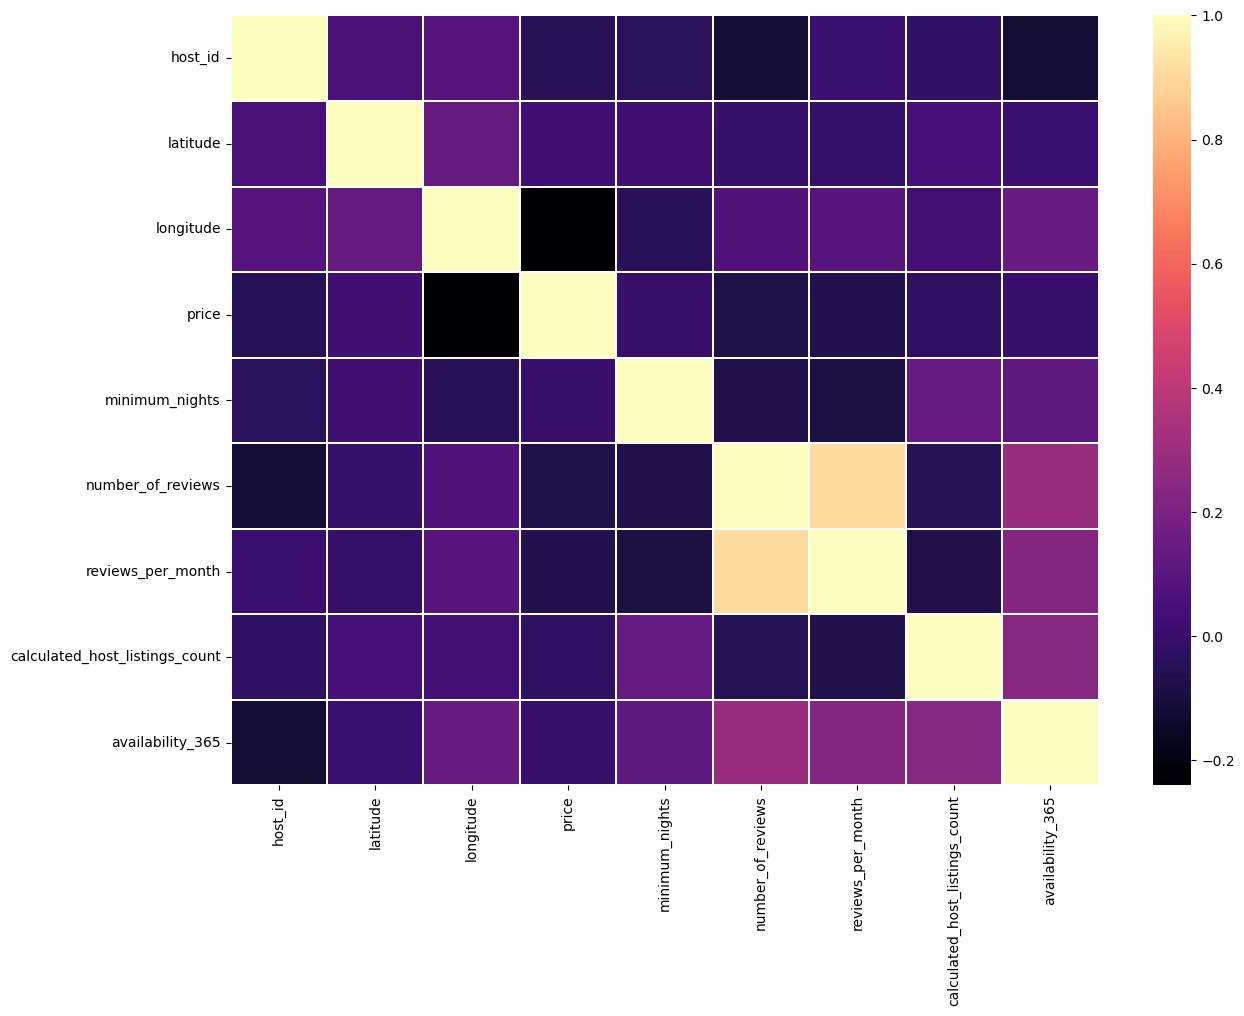

In [97]:
#minimum number of nights and latitude have the strongest correlation, but it's not that strong

import seaborn as sns
fig,ax = plt.subplots(figsize=(14, 10))

sns.heatmap(numsc.corr(), ax = ax, linewidths = 0.05, cmap = 'magma')

In [99]:
#perhaps we might find something useful in the categorical data

cats = data.select_dtypes(include=['object'])
names = list(cats)

cats.head(5)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,10/19/2018
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,5/21/2019
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,11/19/2018


In [100]:
names

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

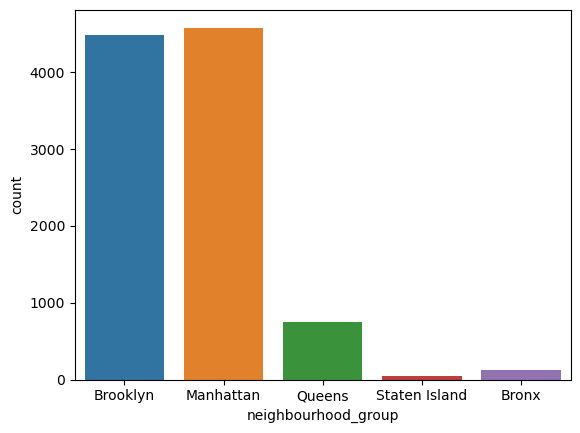

In [103]:
sns.countplot(x="neighbourhood_group", data=cats)

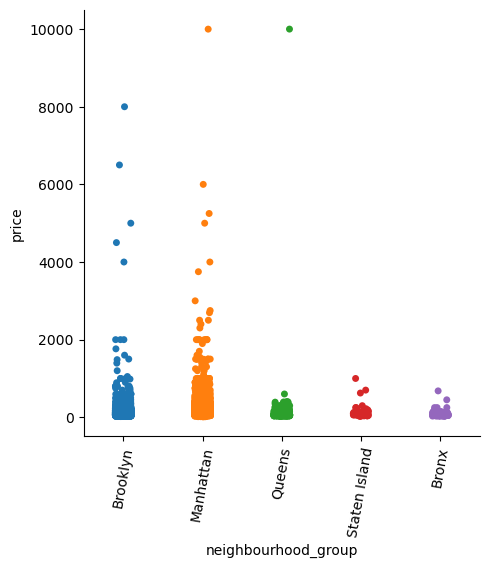

In [105]:
borough_scatterplot = sns.catplot(x="neighbourhood_group", y="price", data=data);
borough_scatterplot.set_xticklabels(rotation=80)